In [1]:
import os
import numpy as np
import pandas as pd
import sqlite3
from os import listdir
import plotly.express as px




In [23]:
def return_values_h(sql_dir, line_number):
    sql_path = return_path(sql_dir)
    conn = sqlite3.connect(sql_path)
    c = conn.cursor()
#     query = "SELECT * FROM TabularDataWithStrings WHERE ReportName='AnnualBuildingUtilityPerformanceSummary' AND TableName='End Uses'"
    query = "SELECT * FROM ReportMeterDataDictionary "
#     query = "SELECT VariableValue FROM ReportMeterData WHERE ReportMeterDataDictionaryIndex= " + str(line_number)
    end_uses = pd.read_sql(query ,conn) #J
    print(end_uses)
    
    electric_kWh = end_uses*2.7778e-7
    return electric_kWh


def return_path(sql_dir):
    sql_file = 'eplusout.sql'
    sql_path = os.path.join(sql_dir, sql_file)
    write_dir = sql_dir
    return sql_path



def hourly_df(sql_dir, line_number):
    
#     try:
#         df = pd.DataFrame()
#         df['Modeled Data [kWh]'] = return_values_h(sql_dir, line_number)['VariableValue']
#     #     df['Metered Data [kWh]'] = meter

#         df.index = pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:59:00', freq='10min')
#         df = df.resample('1h').sum()
#     except:
    df = pd.DataFrame()
    df['Electricity [kWh]'] = return_values_h(sql_dir, line_number)['VariableValue']
    df['NaturalGas [kWh]'] = return_values_h(sql_dir, 3421)['VariableValue']
    
#     df['Metered Data [kWh]'] = meter

    df.index = pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:59:00', freq='60min')
    df = df.resample('1h').sum()
    
#     df.rename(columns = {'Modeled Data [kWh]': bldg_name + ' [kWh]'}, inplace = True)
    return df
    

# meter = meters_N73_2020
sql_dir = '/Users/cbianchi/Documents/GitHub/example_workflow/output_ERMA/Power_and_Heat_14_Hangar/run/'

df = hourly_df(sql_dir, 9)


   ReportMeterDataDictionaryIndex VariableType               IndexGroup  \
0                               8          Sum     Facility:Electricity   
1                               9          Sum     Facility:Electricity   
2                              10          Sum     Facility:Electricity   
3                            3299          Sum  Facility:ElectricityNet   
4                            3468          Sum      Facility:NaturalGas   
5                            3469          Sum      Facility:NaturalGas   
6                            3470          Sum      Facility:NaturalGas   

  TimestepType KeyValue             VariableName ReportingFrequency  \
0         Zone     None     Electricity:Facility      Zone Timestep   
1         Zone     None     Electricity:Facility             Hourly   
2         Zone     None     Electricity:Facility              Daily   
3         Zone     None  ElectricityNet:Facility             Hourly   
4         Zone     None      NaturalGas:Faci

TypeError: can't multiply sequence by non-int of type 'float'

<Axes: >

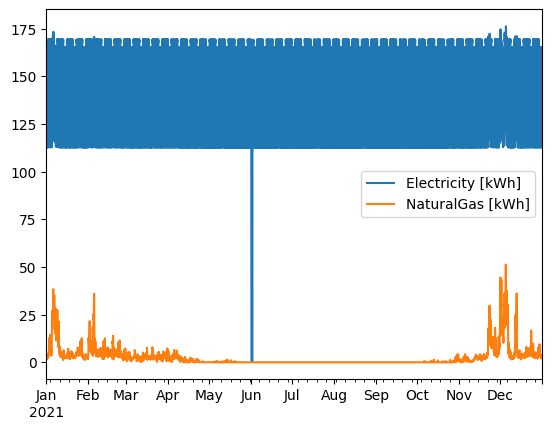

In [22]:
df.plot()